In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Simple linear regression (1)

In [41]:
data = pd.read_csv('data/Linear_regression.csv')[:-5]

X = np.reshape(data.X.to_numpy(), (-1, 1))
y = np.reshape(data.Y.to_numpy(), (-1, 1))
data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


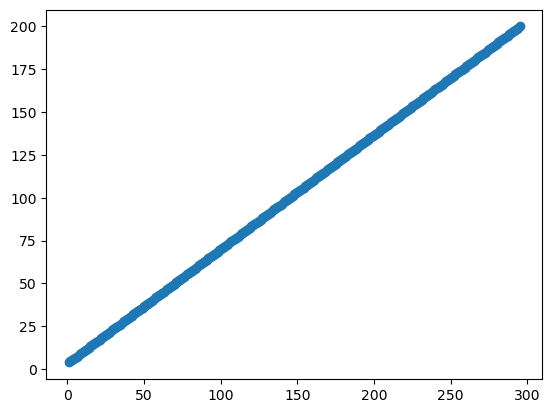

In [42]:
fig, ax = plt.subplots()
ax.scatter(X, y)
# ax.set(xlim=(0, 30), ylim=(0,30))
plt.show()
# plt.scatter(data.X, data.Y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=392)


## OLS

In [44]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [46]:
print(reg.coef_)
print(reg.score(X_test, y_test))
print(cross_val_score(reg, X_test, y_test, scoring='neg_mean_squared_error').mean())

[[0.66666667]]
1.0
-4.200171962752769e-16


adding some noise to data

In [112]:
mu, sigma = 0, 10
# creating a noise with the same dimension as the dataset (2,2)
noise = np.random.normal(mu, sigma, [len(data), 1])
X_noised = np.reshape(data.X.to_numpy(), (-1, 1)) + noise.reshape(-1, 1)
noise = np.random.normal(mu, sigma, [len(data), 1])
y_noised = np.reshape(data.Y.to_numpy(), (-1, 1)) + noise.reshape(-1, 1)
noise[:2]

array([[13.58564342],
       [-1.97400398]])

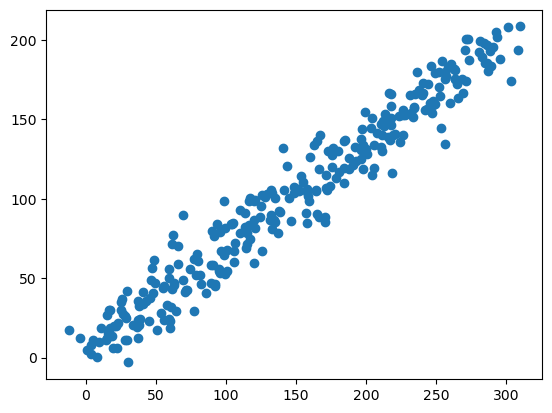

In [113]:
fig, ax = plt.subplots()
ax.scatter(X_noised, y_noised)
plt.show()

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_noised, y_noised, test_size=0.2, random_state=392)


In [121]:
noise_reg = linear_model.LinearRegression()
noise_reg.fit(X_train, y_train)
print(cross_val_score(noise_reg, X_test, y_test, scoring='r2').mean())

0.925532734184279


In [173]:
coeffs = noise_reg.coef_.reshape(1).tolist() + [0]
curve = np.poly1d(coeffs)
coeffs

[0.653831289953644, 0]

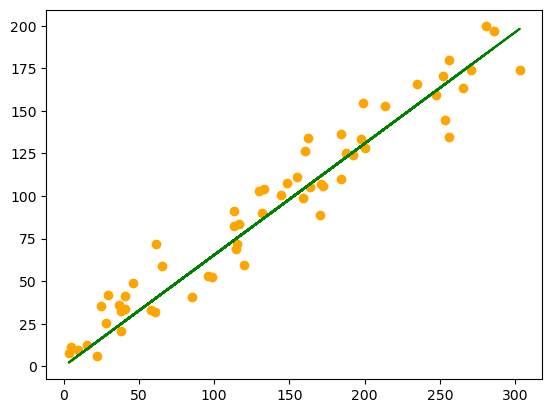

In [177]:
fig, ax = plt.subplots()
ax.scatter(X_test, y_test, color='orange')
ax.plot(X_test, [curve(item) for item in X_test], color='green')
plt.show()

## Ridge regression (with regularization)

In [193]:
from sklearn import linear_model

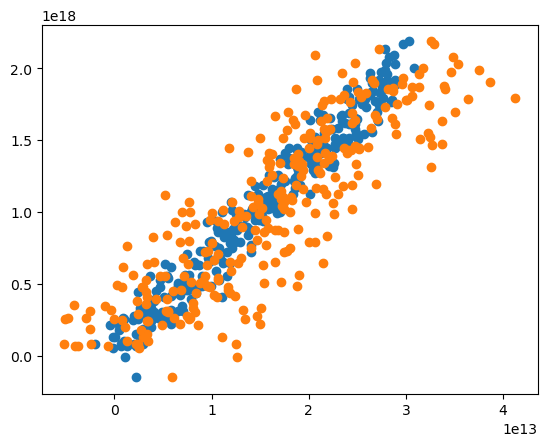

In [299]:
# Creating more noise to data
mu, sigma = 0, 10
mu2, sigma2 = 10, 50
noise = np.random.normal(mu, sigma, [len(data), 1])
X_noised1 = (np.reshape(data.X.to_numpy(), (-1, 1)) + noise.reshape(-1, 1))*10e10
noise = np.random.normal(mu2, sigma2, [len(data), 1])
X_noised2 = (np.reshape(data.X.to_numpy(), (-1, 1)) + noise.reshape(-1, 1))*10e10
X_noised = np.concatenate((X_noised1, X_noised2), axis=1)

noise = np.random.normal(mu, sigma, [len(data), 1])
y_noised = (np.reshape(data.Y.to_numpy(), (-1, 1)) + noise.reshape(-1, 1))*10e15
X_train, X_test, y_train, y_test = train_test_split(X_noised, y_noised, test_size=0.2, random_state=392)
fig, ax = plt.subplots()
ax.scatter(X_noised1, y_noised)
ax.scatter(X_noised2, y_noised)
plt.show()

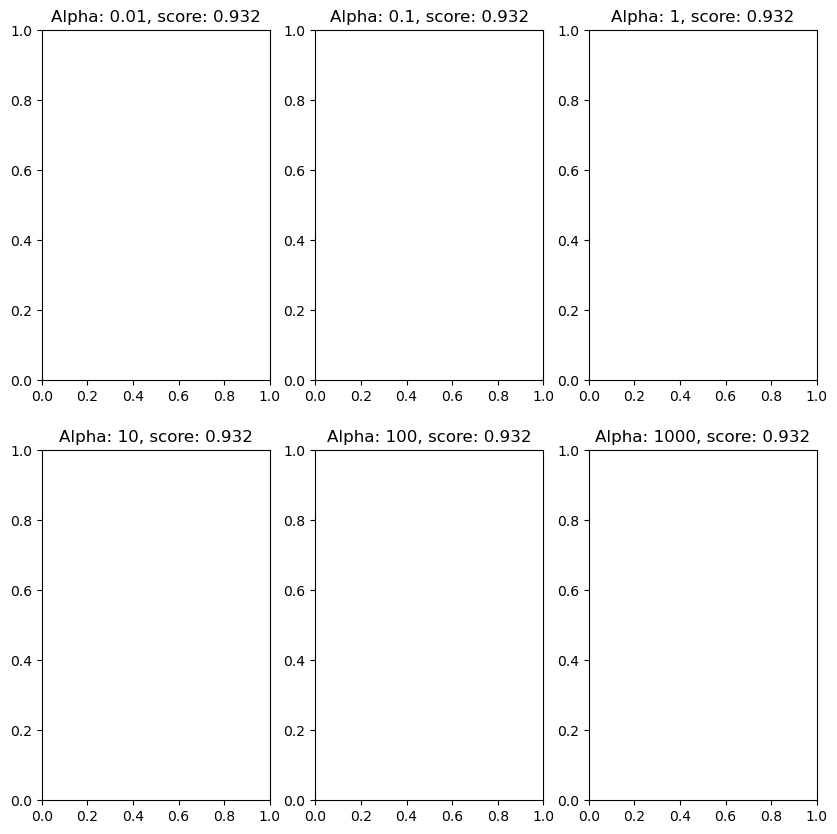

In [303]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
axes = axes.reshape(-1)
for i in range(6):
    ridge_reg = linear_model.Ridge(
        alpha=1*pow(10, i-15) # coefficient of regularization
    )
    ridge_reg.fit(X_train, y_train)
    # coeffs = ridge_reg.coef_.reshape(-1, 1).tolist() + [0]
    # curve = np.poly1d(coeffs)
    score = cross_val_score(ridge_reg, X_test, y_test, scoring='r2').mean()
    axes[i].set_title(f'Alpha: {1*pow(10, i-2)}, score: {round(score, 3)}')
    # axes[i].scatter(X_test, y_test, color='orange')
    # axes[i].plot(X_test, [curve(item) for item in X_test], color='green')
# plt.show()

# Medical insurance (regression)

bmi - body mass index
charges - individual medical costs billed by health insurance (target)

In [202]:
data = pd.read_csv('data/insurance_reg.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


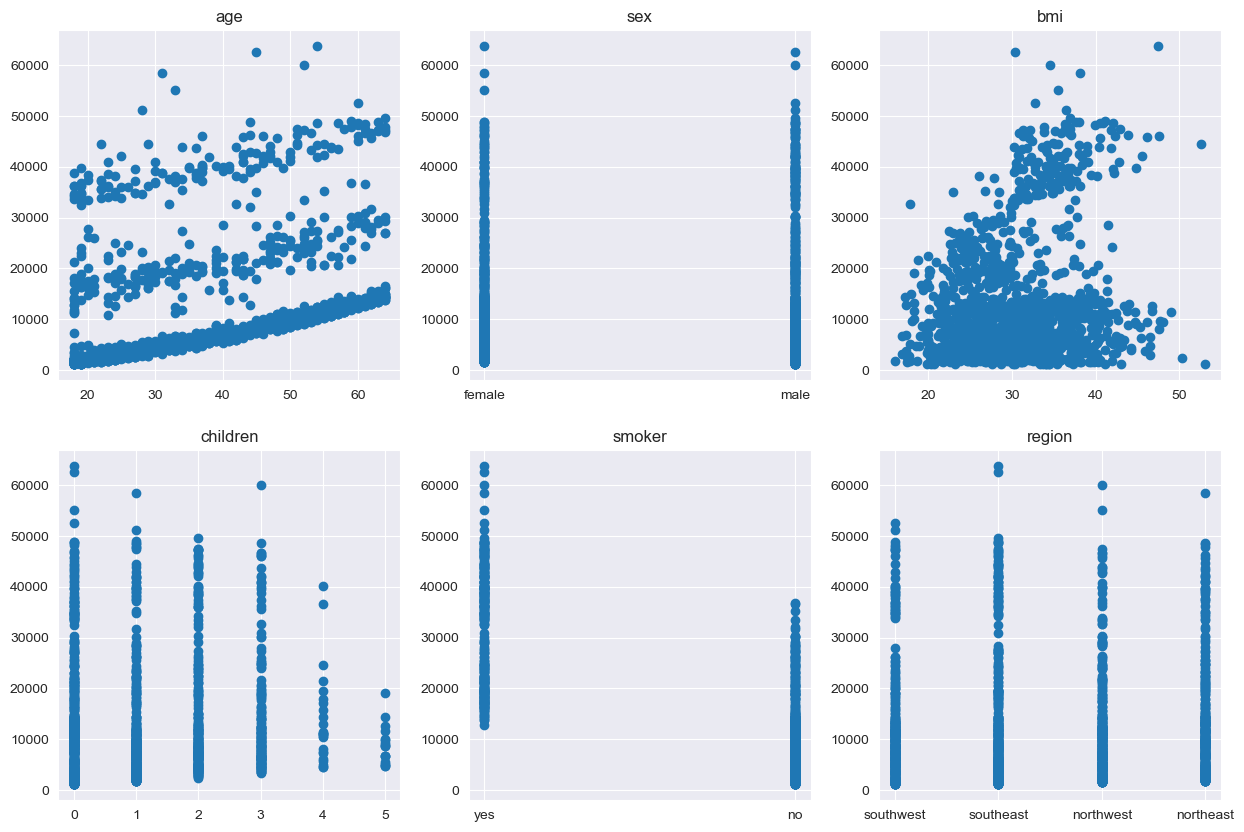

In [203]:
columns = [item for item in data.columns if item != 'charges']
fig, (axes) = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
axes = axes.reshape(-1)
for i in range(len(columns)):
    axes[i].scatter(data[columns[i]], data.charges)
    axes[i].set_title(f'{columns[i]}')
plt.show()

## Baseline model

In [204]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data[['sex', 'smoker', 'region']])
data[['sex', 'smoker', 'region']] = enc.transform(data[['sex', 'smoker', 'region']])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [205]:
X = data[columns]
y = data.charges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

clf = LinearRegression()
results = cross_validate(clf, X, y, cv=5, scoring='r2')
# clf.fit(X_train, y_train)
# print(cross_val_score(clf, X_test, y_test, scoring='r2').mean())
print(results['test_score'].mean())

0.7472559473580954


## Model 2

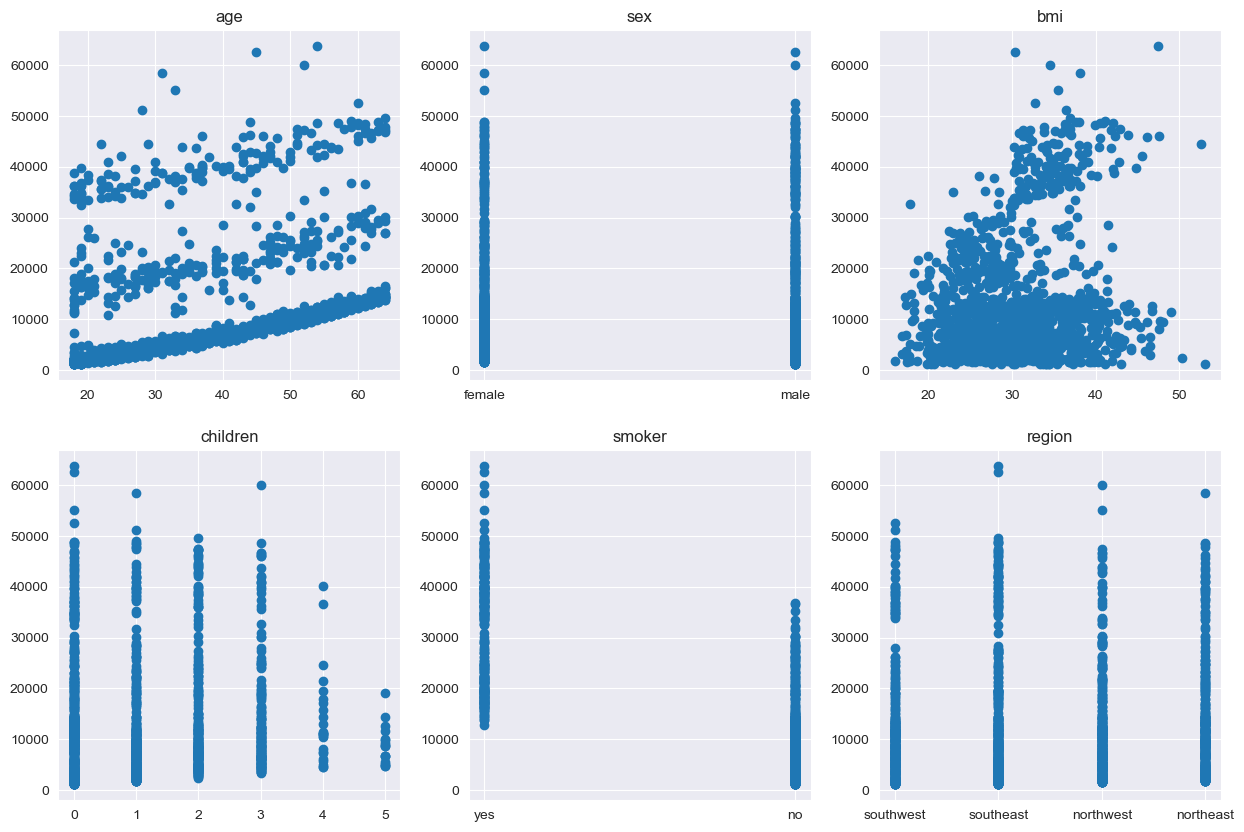

In [8]:
data = pd.read_csv('data/insurance_reg.csv')
columns = [item for item in data.columns if item != 'charges']
fig, (axes) = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
axes = axes.reshape(-1)
for i in range(len(columns)):
    axes[i].scatter(data[columns[i]], data.charges)
    axes[i].set_title(f'{columns[i]}')
plt.show()

In [209]:
from sklearn.preprocessing import OrdinalEncoder
data = pd.read_csv('data/insurance_reg.csv')
enc = OrdinalEncoder()
enc.fit(data[['sex', 'smoker', 'region']])
data[['sex', 'smoker', 'region']] = enc.transform(data[['sex', 'smoker', 'region']])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [210]:
d = pd.DataFrame({'sex': [0],
                  'smoker': [0],
                  'region': [0]})
print(enc.inverse_transform(d))
enc.categories_

[['female' 'no' 'northeast']]


[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

<AxesSubplot:>

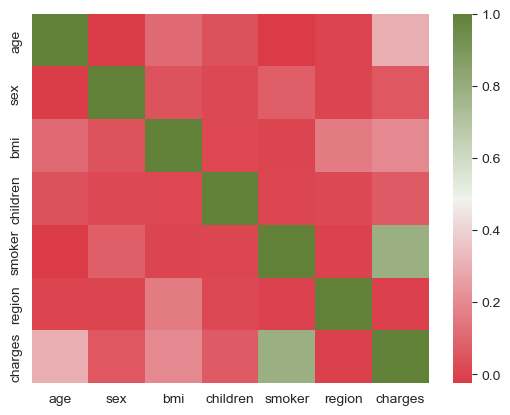

In [211]:
sns.heatmap(data.corr(), cmap=sns.diverging_palette(10, 110, as_cmap=True))

In [212]:
data.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

As we see - strong correlation between charges and smoker, slight correlation with age and charges, bmi and charges.

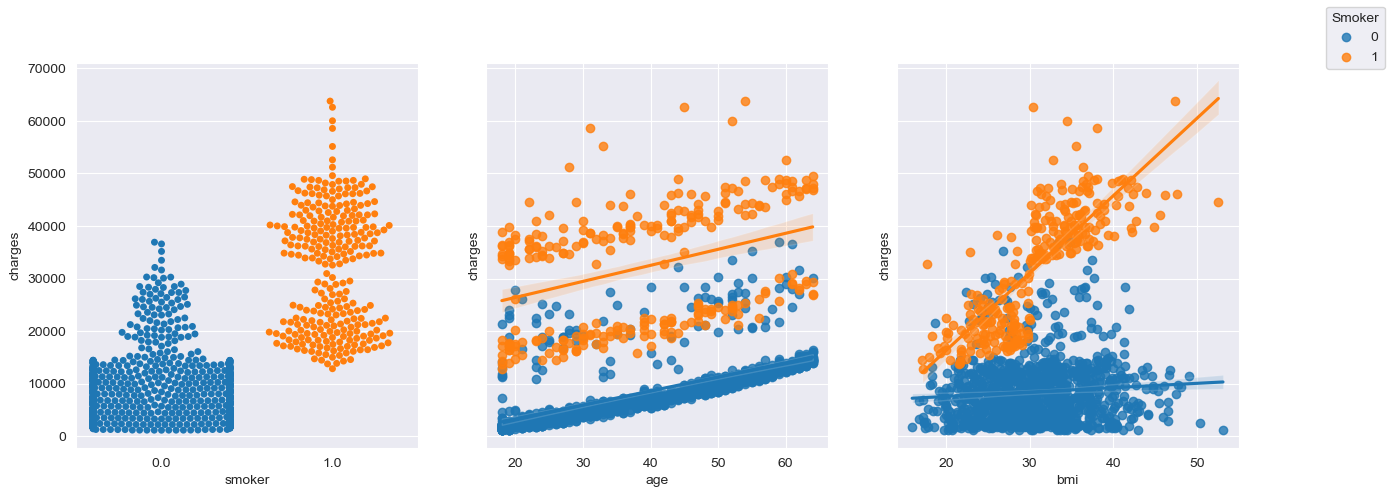

In [213]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5), sharey=True)
sns.swarmplot(data=data, x='smoker', y='charges', ax=axes[0])
sns.regplot(data=data[data.smoker == 0], x='age', y='charges', ax=axes[1], label='0')
sns.regplot(data=data[data.smoker == 1], x='age', y='charges', ax=axes[1], label='1')
sns.regplot(data=data[data.smoker == 0], x='bmi', y='charges', ax=axes[2])
sns.regplot(data=data[data.smoker == 1], x='bmi', y='charges', ax=axes[2])
fig.legend(title='Smoker', loc=1)
fig.show()

In [473]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate

copy_data = data.drop(columns=['sex', 'children', 'region'])
y = copy_data.pop('charges')
X = copy_data.copy()
quad = PolynomialFeatures(2)
X_quad = quad.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.1)

polynom_lr = LinearRegression()
results = cross_validate(polynom_lr, X_train, y_train, cv=5, scoring='r2', return_estimator=True)
best_model = results['estimator'][list(results['test_score']).index(results['test_score'].max())]

print(results['test_score'].mean(), best_model.score(X_test, y_test))

0.8345935333320605 0.8448051588745713


In [513]:
test_df = pd.DataFrame({
    'y_pred': best_model.predict(X_test).reshape(-1),
    'y_true': y_test.to_numpy().reshape(-1)
})
test_df = test_df.sort_values(by='y_true').reset_index(drop=True).reset_index()
test_df['residual'] = test_df['y_true'] - test_df['y_pred']
test_df.head()

,index,y_pred,y_true,residual
0,0,4199.308485,1131.5066,-3067.801885
1,1,4107.503932,1135.9407,-2971.563232
2,2,4295.040187,1252.4070,-3042.633187
3,3,4334.951872,1253.9360,-3081.015872
4,4,4354.814608,1256.2990,-3098.515608


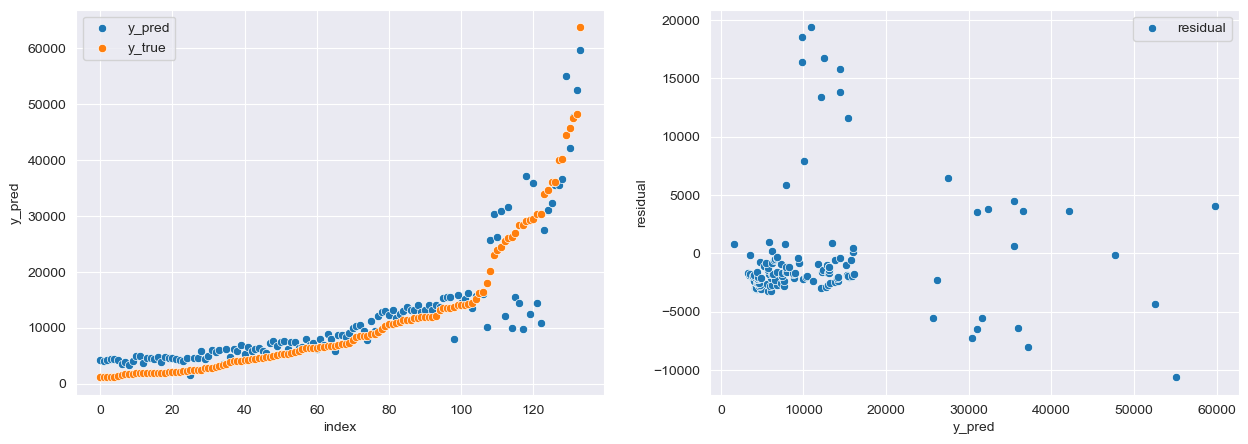

In [515]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
# sns.scatterplot(data=test_df)
sns.scatterplot(data=test_df, x='index', y='y_pred', ax=axes[0], label='y_pred')
sns.scatterplot(data=test_df, x='index', y='y_true', ax=axes[0], label='y_true')
sns.scatterplot(data=test_df, x='y_pred', y='residual', ax=axes[1], label='residual')
axes[0].legend()
axes[1].legend()
# fig.show()